# Table of Contents
 <p>

In [1]:
# A special directive that will display plots inline in a jupyter notebook
%matplotlib inline

In [2]:
import urllib2
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib.font_manager import FontProperties
plt.style.use('seaborn-darkgrid')

In [3]:
#save the api call url as a variable
url = 'http://api.worldbank.org/v2/countries/all/indicators/SH.STA.ACSN?per_page=15312&date=1960:2018&format=json'
#open the webiste with the results of the api call
json_obj = urllib2.urlopen(url)

In [4]:
#load the reuslts into a json object in python
data = json.load(json_obj)

In [5]:
#now i need to extract the useful information - for this it will be the country, the date, and the value (the % access to sanitation facilities)
#create 3 empty lists to later store the information
country = []
value = []
date = []
#iterate the entire length of the json file 
for i in range(15312):
    country.append(data[1][i]['country']['value']) #store the results of data[1][i]['country']['value'] in the country list
    value.append(data[1][i]['value']) #store the results of data[1][i]['country']['value'] in the value list
    date.append(data[1][i]['date']) #store the results of data[1][i]['country']['value'] in the date list

In [6]:
#create a pandas dateframe from the data to more easily look at trends
df = pd.DataFrame({'country': country, 'value': value, 'date':date})

In [7]:
#make sure this worked
df.head()

,country,date,value
0,Arab World,2017,NaN
1,Arab World,2016,NaN
2,Arab World,2015,90.370494
3,Arab World,2014,83.145325
4,Arab World,2013,83.114690


In [8]:
#exclude null values from analysis
df = df.dropna()

In [9]:
# data available for the earliest date is different for each country
# df.loc[df.groupby("country")["date"].idxmin()]['value'].values --> will group the countries, find the index of the earliest date (min), and extract the value from that year
# df.loc[df.groupby("country")["date"].idxmax()]['value'].values --> will group the countries, find the index of the last date (max), and extract the value from that year
changes = df.loc[df.groupby("country")["date"].idxmin()]['value'].values-df.loc[df.groupby("country")["date"].idxmax()]['value'].values

In [10]:
#save the order of countries
country = df.loc[df.groupby("country")["date"].idxmin()]['country']

In [11]:
#create a df with a list of the countries
country_df = pd.DataFrame(country, columns={'country'})

In [12]:
#add the change variable that we calculated above to the df
country_df['change'] = changes

In [13]:
#only include top 10 declines in access to sanitation
country_df[country_df['change']>0].sort_values('change', ascending=False)[:5]

,country,change
5885,Djibouti,18.7
6871,Georgia,11.5
11105,Nigeria,9.1
6229,Equatorial Guinea,6.6
14063,Tonga,3.4


In [14]:
# make a new list with only the 5 countries that decreased the most
declining_countries = country_df[country_df['change']>0].sort_values('change', ascending=False)[:5]['country'].values

In [16]:
#create a new df from the original df but with ONLY the 5 countries that declined that most
decline = df[df['country'].isin(declining_countries)]

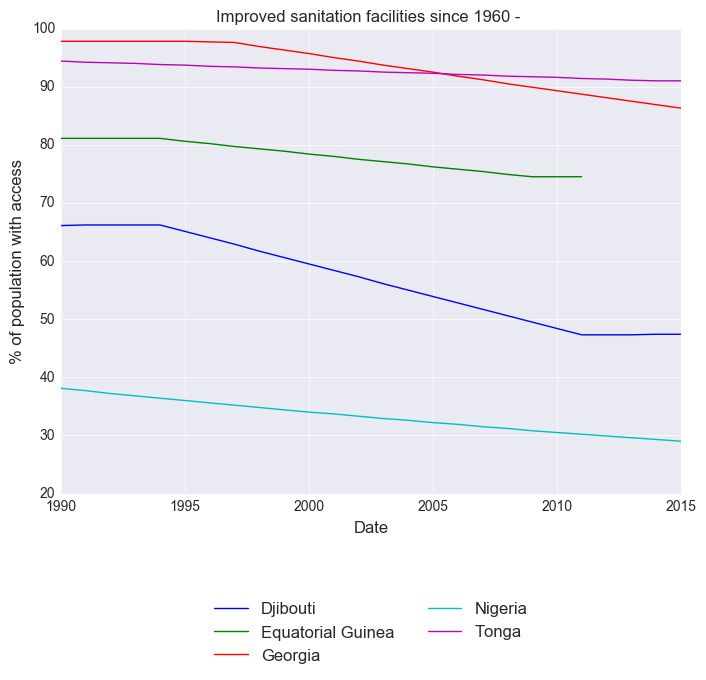

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

for key, grp in decline.groupby(['country']):
    ax = grp.sort_values('date').plot(ax=ax, kind='line', x='date', y='value', label=key)

plt.ylabel('% of population with access', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Improved sanitation facilities since 1960', fontsize=12)
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.savefig('decrease.png', dpi=400, bbox_inches='tight')
plt.show()

In [18]:
#creating 4 new variables to represent income groups
LIE = 'Low income'
LMIE = 'Lower middle income'
UMIE = 'Upper middle income'
HIE = 'High income'

In [20]:
# the json file actually has entries that denote income groups so i just need to index the dataframe for the groups that i need
income_df =  df[(df.country == LIE) | (df.country == LMIE) | (df.country == UMIE) | \
             (df.country == HIE) | (df.country == 'World')]

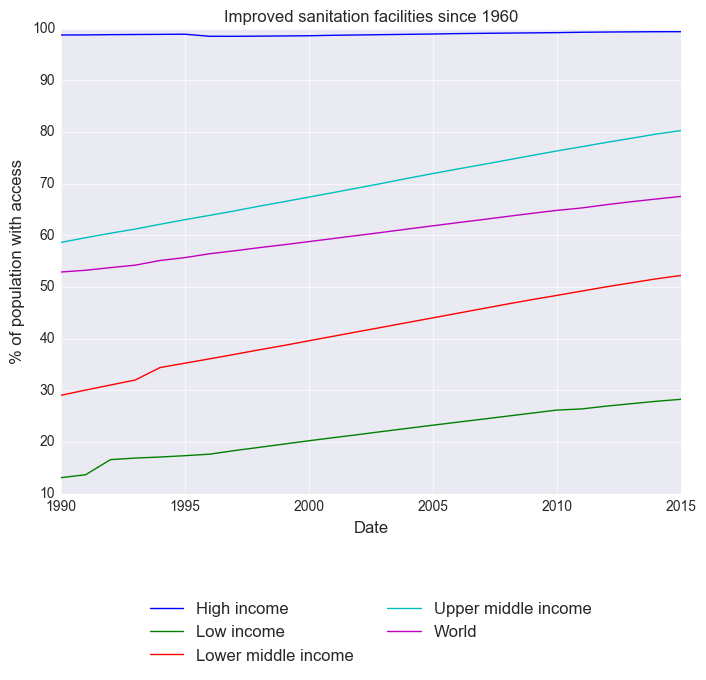

In [21]:
#make the plot
fig, ax = plt.subplots(figsize=(8, 6))

for key, grp in income_df.groupby(['country']):
    ax = grp.sort_values('date').plot(ax=ax, kind='line', x='date', y='value', label=key)

plt.ylabel('% of population with access', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Improved sanitation facilities since 1960', fontsize=12)
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
#plt.savefig('decrease.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
#see who has changed the most
beg = income_df[income_df['date'] == '1990']['value'].values
end = income_df[income_df['date'] == '2015']['value'].values
#subtract the end value from the beginning value and print the income group
print zip(income_df[income_df['date'] == '1990']['country'],\
       end - beg)

[(u'High income', 0.64074209203539567), (u'Low income', 15.170026916526201), (u'Lower middle income', 23.193720185731699), (u'Upper middle income', 21.644699404988891), (u'World', 14.632078812554994)]


In [23]:
df[df['country'] == 'World']

,country,date,value
2670,World,2015,67.528745
2671,World,2014,67.026518
2672,World,2013,66.503469
2673,World,2012,65.931285
2674,World,2011,65.298910
2675,World,2010,64.828864
2676,World,2009,64.254822
2677,World,2008,63.657723
2678,World,2007,63.042215
2679,World,2006,62.451341


In [24]:
df[df['country'] == 'Djibouti']

,country,date,value
5860,Djibouti,2015,47.4
5861,Djibouti,2014,47.4
5862,Djibouti,2013,47.3
5863,Djibouti,2012,47.3
5864,Djibouti,2011,47.3
5865,Djibouti,2010,48.4
5866,Djibouti,2009,49.5
5867,Djibouti,2008,50.6
5868,Djibouti,2007,51.7
5869,Djibouti,2006,52.8
